In [5]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import pandas as pd
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Kayaking.head()

,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0


In [11]:
df=pd.concat([Kayaking,Triathlon,Fencing])
df

,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0
...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0


Q1 Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [3]:
 import pandas as pd
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
AllAthletesData=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
AllAthletesData.head()
AllAthletesData.to_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData',index=False)

2.Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [4]:
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
df_excersizetype

,ID,time,RR,VO2,power,ExType
0,1,-130.840,672.0,0.302008,0,Warm Up
1,1,-130.168,672.0,0.302008,0,Warm Up
2,1,-129.536,632.0,0.301336,0,Warm Up
3,1,-128.824,712.0,0.301336,0,Warm Up
4,1,-127.948,876.0,0.301336,0,Warm Up
...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,Cool Down
52058,18,947.816,528.0,0.507071,0,Cool Down
52059,18,948.344,528.0,0.507071,0,Cool Down
52060,18,948.884,540.0,0.507071,0,Cool Down


3.What was the average time each tested lasted excluding warm up for all athletes?

In [11]:
df_Average=df_excersizetype[df_excersizetype['time'] >= 0]
print('Average time:',round(df_Average['time'].mean(),2))

Average time: 604.0


4.Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

5.What was the average time each test lasted (including warm up) for all athletes?

In [10]:
print('Average Time:',round(df_excersizetype['time'].mean(),2))


Average Time: 547.46


6.What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)?
You may choose to show averages based on any one/all sports. 

7.Create a correlation matrix to show the relationship between HR, BMI and sport.

8.What are the names of the kayaking athletes?

9.What was the average HRV of the triathletes?

10.How long was athlete 12 in HR Zone 5?

11.Create any 3d plot using any data. Values do not have to be from the dataset given. 

12.What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

13.Calculate the year of birth of each athlete and store it as a column in the tables.

14.What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

15.Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add 
    this as a column to every table:
Zone 1 (recovery/easy)       <100 HR max
Zone 2 (aerobic/base)        100-120 HR max
Zone 3 (tempo)        120-135 HR max
Zone 4 (lactate threshold)        135-155 HR max
Zone 5 (anaerobic)        155+ HR max and above

In [7]:
df_excersizetype['HR']=60/(df_excersizetype['RR']/1000)
df_excersizetype
df_excersizetype.loc[df_excersizetype['HR'] < 100,'Zone Type']='Zone 1'
df_excersizetype.loc[(df_excersizetype['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
df_excersizetype.loc[(df_excersizetype['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
df_excersizetype.loc[(df_excersizetype['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
df_excersizetype.loc[df_excersizetype['HR'] > 155, 'Zone Type'] = 'Zone 5'
df_excersizetype

,ID,time,RR,VO2,power,ExType,HR,Zone Type
0,1,-130.840,672.0,0.302008,0,Warm Up,89.285714,Zone 1
1,1,-130.168,672.0,0.302008,0,Warm Up,89.285714,Zone 1
2,1,-129.536,632.0,0.301336,0,Warm Up,94.936709,Zone 1
3,1,-128.824,712.0,0.301336,0,Warm Up,84.269663,Zone 1
4,1,-127.948,876.0,0.301336,0,Warm Up,68.493151,Zone 1
...,...,...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,Cool Down,111.940299,Zone 2
52058,18,947.816,528.0,0.507071,0,Cool Down,113.636364,Zone 2
52059,18,948.344,528.0,0.507071,0,Cool Down,113.636364,Zone 2
52060,18,948.884,540.0,0.507071,0,Cool Down,111.111111,Zone 2


16.Calculate the BMI of every athlete and display it as a list.

Q17:What is the maximum ventilatory threshold for triathletes.

Q18:Display the number of athletes in every sport against the name of the sport.

Q19:Display a bar chart showing the average V02 Max by sport.

Q20:Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend? 

Q21:Display a pie chart of number of athletes by sport.

Q22:Using any 10 HR values print even if the value is an even number and odd if its an odd number

Q23:Which heart rate zone did most participants spend the longest duration of time in?

Q24:Store athlete name and sport in a dictionary as a pair of values.

Q25:Using arrays and loops, find the count of athletes based on gender.

Q26:Create a sankey diagram to show the groups of race within each sport

Q27:Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

Q28:Print athlete 15s Age and Pvt1 using the format() function

Q29:On average how long was each participants’ warm up?

Q30:Display the HRV of each athlete?

Q31:Return the count of athletes for any sport that the user inputs.

Q32:Insert the name of every athlete into an array and display the length of that array.

Q33: Create a list and a tuple. Print the types and lengths of  both.

Q34: Display a word cloud using any values in the dataset

Q35: Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

Q36: Plot the time series of HR( every 5 mins) of athlete 1

Q37: What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

Q38: What is the average  difference in IBI during the warm up Vs the actual test?

Q39: Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10]

Q40:   [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99

Q41: What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

Q42: What was the difference in heart rate between warm up and GET for athlete 1

Q43: Create a pivot table that shows count of patients within each age group and sport

Q44: Display a  distrubution chart of MAX V02 for all athletes

Q45: Create a dummy array with no data with a size of 15.

Q46: How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

Q47: Convert ' sport' into a numeric field through Label encoding

Q48: What was the average age of the athletes?


Q49: Retrieve the row with minimum IBI for fencing athletes using sorting technique.

Q50 Create a violin chart using any 2 columns in the dataset

Q51 List every athlete’s V02 ml/kg

Q52 Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

Q53 phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

Q54 Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

Q55 Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

Q56 Display a histogram to show distribution of athletes by sport.

Q57 get the first letter of last name of students using for loops and RegEX

Q58 What is the average % difference in heart rate between warm up and GET for all athletes?

Q59 Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

Q60 get the last letter      of athletes last names using RegEX

Q61 Reverse an arrays order in Python. You can use any array with any values you like.

Q62 What is the root mean of successive differences for 30 consecutive minutes for each athlete.

Q63 On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

Q64 Count athletes based on Gender using count plot

Q65:   [ 1,  2,  3,  4,  5],C
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17.


In [7]:
a=np.arange(1,31).reshape(6,5)
#display(a)
#in below ways it can be represented.
print(a[0,3])
print(a[1,1])
print(a[1,4])
print(a[3,1])

4
7
10
17


Q66: On average, how long did each participant spend at 200 watts?

In [13]:
#to get the value in dataframe with power = 200 watts
filtered_df = df[df['power'] == 200]
avg_time =filtered_df.groupby("ID")["time"].mean().round(1)
avg_time

ID
3     750.4
4     747.4
5     752.2
6     747.6
9     689.2
10    736.2
11    755.5
12    748.7
13    747.9
14    760.2
15    749.1
16    758.2
18    734.5
Name: time, dtype: float64

Q67: Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [15]:
kv=Kayaking["VO2"].mean().round(1)
tv=Triathlon["VO2"].mean().round(1)
fv=Fencing["VO2"].mean().round(1)
a= [kv,tv,fv]
print(a)
b=pd.DataFrame(a).max().round(1)
c=b.to_list()
print("Kayaking had the highest average cardiorespiratory fitness in terms of v02 max:", c)

[1.8, 1.2, 1.4]
Kayaking had the highest average cardiorespiratory fitness in terms of v02 max: [1.8]


Q68: What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [15]:
#prerequisite for Q68(because sonam's main dataframe name differ from the team)
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
df=pd.concat([Kayaking,Triathlon,Fencing])
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
df1=pd.DataFrame(Athletes)
df['HR']=60/(df['RR']/1000)
df
df.loc[df['HR'] < 100,'ZoneType']='Zone 1'
df.loc[(df['HR'].between(100,120)), 'ZoneType'] = 'Zone 2'
df.loc[(df['HR'].between(121,135)), 'ZoneType'] = 'Zone 3'
df.loc[(df['HR'].between(136,155)), 'ZoneType'] = 'Zone 4'
df.loc[df['HR'] > 155, 'ZoneType'] = 'Zone 5'
df.head()
df2 = pd.merge(df, df1, on='ID')  #making new data frame by merging all sports data frame and athlete data frame

In [25]:
#During a workout session 220 - age is used as a benchmark for heart rate zones

df2['max_RR']=220-df2['age']      #creating a column which shows Max HR
df3= df2[(df2['HR'])> (df2['max_RR']*.9)]   #exceeded 90% of max HR
df4=df3['ID'].count()                       #records which exceeded 90% of max HR
df5= df['ID'].count()                       # total record
df6= ((df4/df5)*100).round(2)               #percentage calculation
print(df6, " % of athletes exceeded 90% of max HR")

6.91  % of athletes exceeded 90% of max HR


Q69: What was the lowest heart rate recorded at a power wattage of 200

In [27]:
HR = round((60/(filtered_df['RR']/1000)).min(),2)

print("the lowest heart rate recorded at a power wattage of 200: ",HR)

the lowest heart rate recorded at a power wattage of 200:  71.77


Q70: On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [29]:
df7=df2[(df2['HR'])> (df2['max_RR']*.75)]
df8= df7['time'].mean()
print("On Average, most athletes spend",(df8/60).round(2)," min at 75% of MaxHR")

On Average, most athletes spend 12.45  min at 75% of MaxHR


Q71: Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [33]:
#prerequisite for Q71
df['HR']=60/(df['RR']/1000)
df
df.loc[df['HR'] < 100,'ZoneType']='Zone 1'
df.loc[(df['HR'].between(100,120)), 'ZoneType'] = 'Zone 2'
df.loc[(df['HR'].between(121,135)), 'ZoneType'] = 'Zone 3'
df.loc[(df['HR'].between(136,155)), 'ZoneType'] = 'Zone 4'
df.loc[df['HR'] > 155, 'ZoneType'] = 'Zone 5'


In [35]:
df2 = pd.merge(df, df1, on='ID')
pd.crosstab(index=df2.sport, columns= df2.ZoneType)

ZoneType,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5
sport,,,,,
fencing,2258,3700,3723,5979,11321
kayak,1456,2850,3000,4194,6791
triathlon,464,340,1043,812,1781


Q72: Provide an example of a lambda function that multiplies any 2 input values.

In [37]:
v1 =int(input("Please enter your first number: "))
v2=int(input("Please enter your second number: "))
multiply = lambda a, b: a * b
result = multiply(v1, v2)
print(f"The result of multiplying {v1} and {v2} is: {result}")

Please enter your first number:  8
Please enter your second number:  9


The result of multiplying 8 and 9 is: 72


Q73: How long was athlete 17s warm up

In [41]:
#prerequisite for Q73
df.loc[df['time'] < 0,'ExType']='Warm Up' 
df.loc[(df['time'] >= 0) & (df['power'] > 0), 'ExType'] = 'GET'
df.loc[(df['time'] >= 0) & (df['power'] == 0), 'ExType'] = 'Cool Down'


In [43]:
a=df.loc[(df['ID'] == 17) & (df['ExType'] == 'Warm Up')]  # to fetch the ID 17 and ExType is warmup
b = a.groupby('ID')['time'].sum().round()
print(b,'sec')

ID
17   -21964.0
Name: time, dtype: float64 sec


Q74: Take a students full name and reverse it using a for loop

In [45]:
def reverse(string):
    string = [string[i] for i in range(len(string)-1, -1, -1)]
    return "".join(string)

Name = str(input("What is your Full Name: "))

print("The original string  is : ", Name)

print("The reversed string(using reversed) is : ", reverse(Name))


What is your Full Name:  SONAM PRIYA


The original string  is :  SONAM PRIYA
The reversed string(using reversed) is :  AYIRP MANOS


Q75: What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [47]:
df2 = pd.merge(df, df1, on='ID')
#filter applied on, time >0(as it is during the test) and next filter is for total records max HR

filter_df = df2[(df2['time']>0) & (df2['HR'] == (df2['HR'].aggregate('max')))]
print(filter_df[['First Name','Last Name', 'sport','HR']])

      First Name Last Name    sport          HR
44041      Grace   Simmons  fencing  238.095238


Q76: np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [7]:
a=np.arange(1,31).reshape(6,5)
#display(a)
#in below ways it can be represented.
print(a[0,1])
print(a[0,4])
print(a[0:1,1:5:3]) # 2 and 5 are in same row
print(a[2,2])
print(a[4,4])
print(a[5,4])

2
5
[[2 5]]
13
25
30


Q77: Display a violin chart to show distribution of VO2Max against age.

<Axes: xlabel='VO2', ylabel='age'>

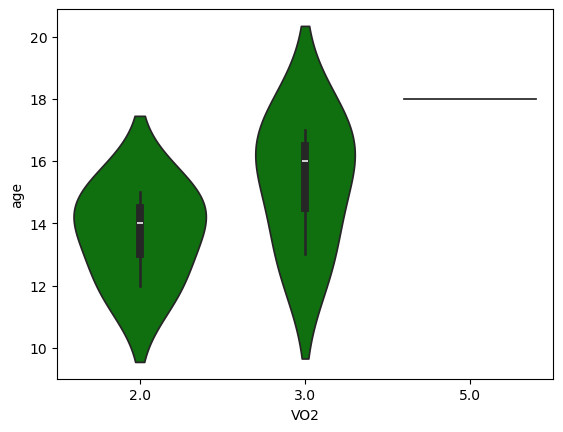

In [19]:
vc=df2.groupby('age')['VO2'].max().round(0)
c=pd.DataFrame(vc)

sns.violinplot(x='VO2', y='age', data=c, color="green")

Q78: Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

Q79: Plot the Donut chart athlete distrubution by Gender

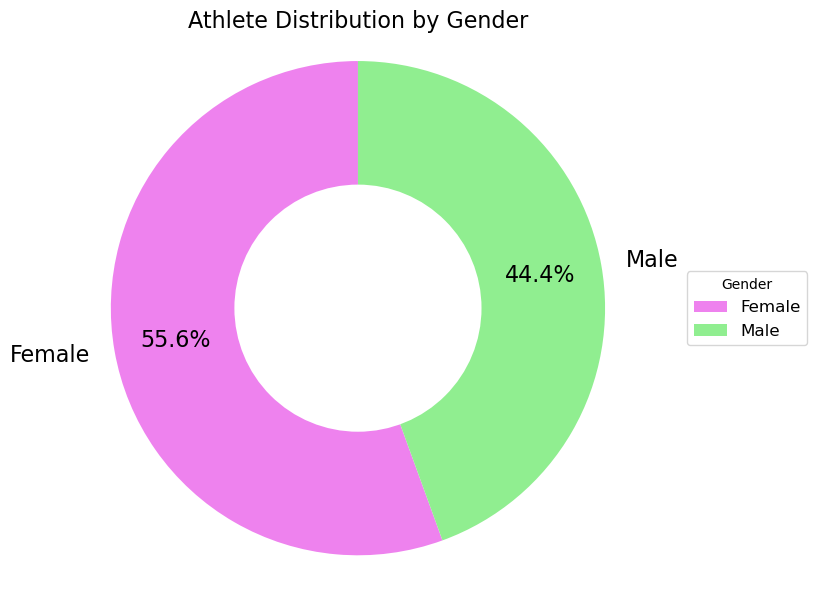

In [21]:
#display(Athletes)
gender_counts = Athletes['Gender'].value_counts()
# Creating donut chart
plt.figure(figsize=(8, 6))
colors = ['Violet', 'lightgreen']  # Lightgreen for male, violet for female
# Creating pie chart further turn into donut
plt.pie(gender_counts.values, labels=gender_counts.index, colors=colors,
        autopct=lambda pct: f'{pct:.1f}%', # This function will be used to format the percentage
        startangle=90, pctdistance=0.75,
        textprops={'fontsize': 16})  # Increase font size of percentage labels
# Creating a circle at the center to make it a donut chart
center_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
# ensuring that pie is drawn as a circle
plt.axis('equal')
plt.title("Athlete Distribution by Gender", fontsize=16)
# Adding legend
plt.legend(gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.tight_layout()
plt.show()

Q80: Find the size of Tuple for any given input 


In [1]:
values =input("Please insert new item: ")
new_values =values.split(",")
a_tuple= tuple(new_values)
print(a_tuple)
print("size of tuple is ", len(a_tuple))

Please insert new item:  4,8,9,8


('4', '8', '9', '8')
size of tuple is  4
